<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2 Continunity and Differentiation**
We define the **Limit** of a function as the value that a function approaches as the input approaches some large value, the concepts of limits are instrumental in the concepts of calculus and other forms of analysis.
For a more formal definiton; $\displaystyle{\lim_{x \to a}}$ $f(x)=L$ if for all $\epsilon$ $>0$ there exists a  $\delta$ $>0$ such that: $|f(x)|-L < ϵ$ if $0 < |x-a|<δ$ or in other words the limit of the function as $x$ approaches $a$ is $L$

The limit of $sin(x)/x$ as $x$ approaches $0$ is used to demonstrate this concept

In [ ]:
import numpy as np
from sympy import symbols, sin, limit

# Showing how the limit approaches a value
def f(x):
    return np.sin(x) / x

# Values of x approaching 0
x_values = [0.1, 0.01, 0.001, 0.0001, 0.00001]

# Compute f(x) for each x
for x in x_values:
    print(f"x = {x}, f(x) = {f(x)}")

# Using sympy to compute limit
x = symbols('x')
f = sin(x) / x
lim = limit(f, x, 0)
print(f"The limit of sin(x)/x as x approaches 0 is: {lim}")

x = 0.1, f(x) = 0.9983341664682815
x = 0.01, f(x) = 0.9999833334166665
x = 0.001, f(x) = 0.9999998333333416
x = 0.0001, f(x) = 0.9999999983333334
x = 1e-05, f(x) = 0.9999999999833332
The limit of sin(x)/x as x approaches 0 is: 1


We state that a function is **Continuous** if the function does not have any abrupt breaks or changes in its value, or in other words if the limit exists at every point.

On the other hand we say that a function is **Discontinuous** if it does contain breakes or changes in values, the limit either does not exist or does not equal the value of the function

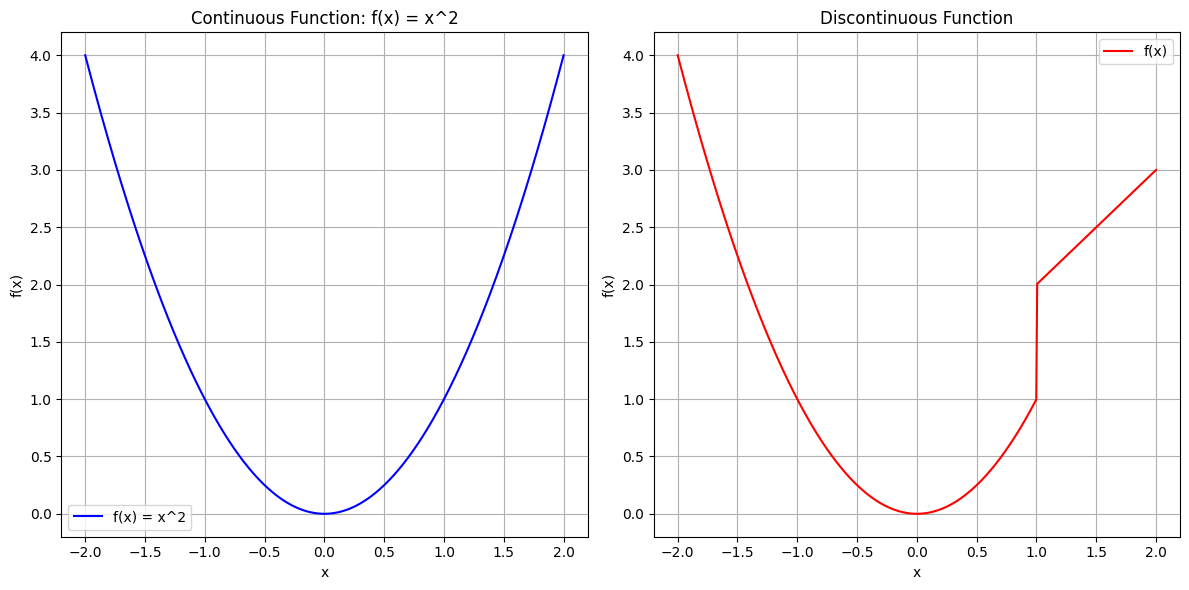

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The continuous function x^2
def f_continuous(x):
    return x**2

# The discontinuous piecewise function
def f_discontinuous(x):
    return np.where(x <= 1, x**2, x + 1)

x = np.linspace(-2, 2, 500)

# Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, f_continuous(x), label="f(x) = x^2", color="blue")
plt.title("Continuous Function: f(x) = x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, f_discontinuous(x), label="f(x)", color="red")
plt.title("Discontinuous Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The **Derivative** of a function is a variable that measure the raye of change of a function's value output with respect to another variable

Mathematically we define the derivative of a function $f(x)$ as the following $f'(a)=\displaystyle{\lim_{h \to 0}}$ $ \frac{f(a+h)-f(a)}{h}$ where $h$ represents a small change in $x$, the derivative $f'(a)$ is the slope of the tangent line to the function when $x = a$.

In general, we have these properties for understanding the derivative of function:

$f'(a) > 0$ the function is increasing at $x=a$

$f'(a) < 0$ the function is decreasing at $x=a$

$f'(a) = 0$ the function has either a maximum, minimum, or saddle point at $x=a$

**Taylor's Theorem** is a way of approximating a function through a polynomial around a point $x=a$

We define **Taylor series expansion** of f(x) around $a$ as the follwoing:

$f(x)=f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 +$ $....$

In general the more terms included in your taylor series expansion the more accurate the approximation will be. Below is an example of a taylor series expansion for $cos(x)$ around $x = 0$

<ipython-input-15-8de25a551111>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  factorial = np.math.factorial(2 * n)


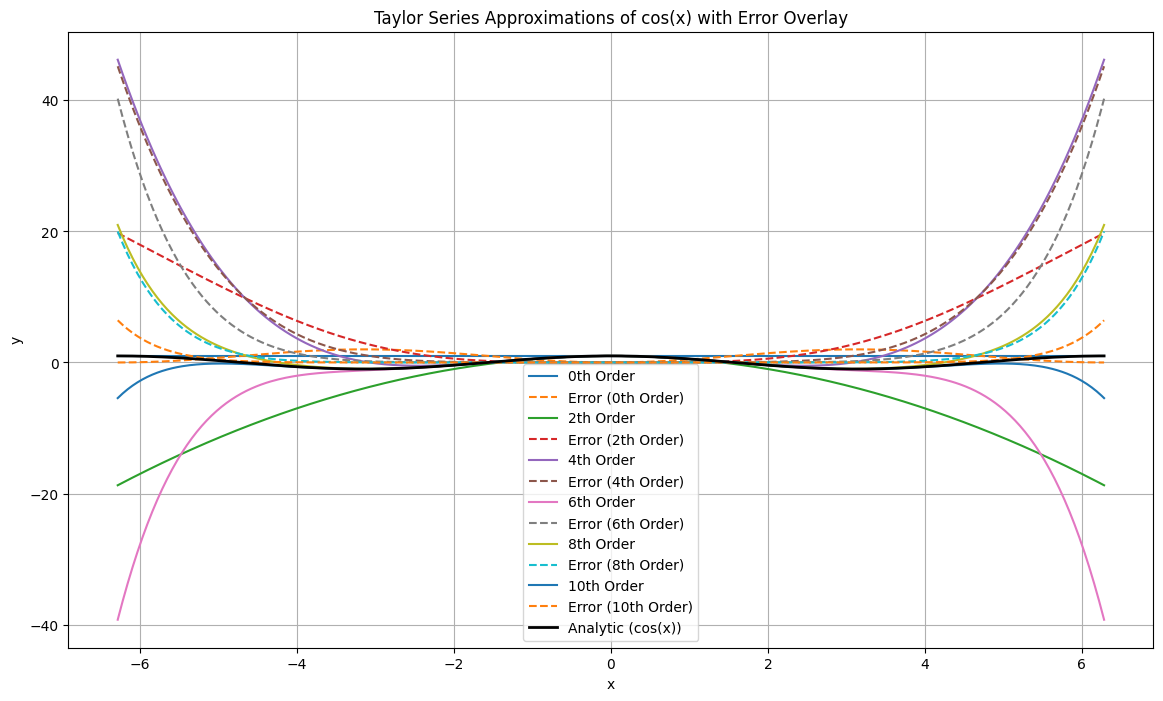

In [15]:
# Example of Taylor series approximation of cos(x)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.zeros(len(x))

num_terms = 6
labels = [f'{2*n}th Order' for n in range(num_terms)]


plt.figure(figsize=(14, 8))

# Taylor series approximations
for n, label in zip(range(num_terms), labels):
    factorial = np.math.factorial(2 * n)
    y = y + ((-1)**n * (x)**(2 * n)) / factorial


    plt.plot(x, y, label=label)

    # Computing error
    true_values = np.cos(x)
    error = np.abs(true_values - y)

    # Error with dashed lines
    plt.plot(x, error, '--', label=f'Error ({label})')

# Plot the true function
plt.plot(x, true_values, 'k', label='Analytic (cos(x))', linewidth=2)

plt.grid()
plt.title('Taylor Series Approximations of cos(x) with Error Overlay')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In the above example we define the taylor series expansion for $cos(x)$ around $x=0$ to be

$cos(x) = \displaystyle{\sum_{n=0}^{\infty}\frac{(-1)^nx^{2n}}{(2n)!}}$

We have ploted the the error of the approximation over the actual true value of the function. We find that as x increases our approximation becomes more and more inaccurate and that at $x = 0$ we obtain very small error which validates our Taylor series approximation.

# **3.3 Optimization with Gradient Descent**
In terms of optimization and the optimality conditions for unconstrained continuous functions it is import to discuss the concept of minimizers. Specifically local and global minimizers.

A **Local Minimizer** of $f(x)$ exists if said point $x_{min}$ is the lowest point in a contained local region, i.e. there may be lower points in the function but they exist outside of the local region.

A **Global Minimizer** of $f(x)$ exists if said point $x_{min}$ is the lowest point in the entire function

Below is an example of local and global min of the quadratic function: $f(x) =x^4-3x^2+x$

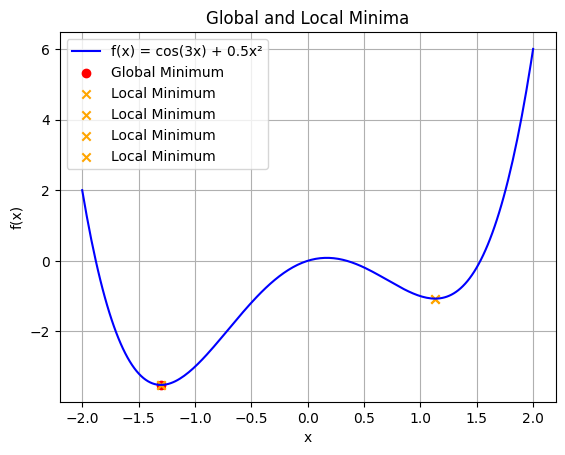

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x):
    return x**4 - 3*x**2 + x

global_result = minimize(f, x0=0)
global_min_x = global_result.x
global_min_y = global_result.fun


range_local_minima = [-2, -1, 1, 2]
local_minima = []

for x0 in range_local_minima:
    result = minimize(f, x0=x0)
    local_minima.append((result.x[0], result.fun))

x = np.linspace(-2, 2, 300)
y = f(x)

plt.plot(x, y, label="f(x) = cos(3x) + 0.5x²", color="blue")
plt.scatter(global_min_x, global_min_y, color='red', marker='o', label="Global Minimum")

for x_min, y_min in local_minima:
    plt.scatter(x_min, y_min, color='orange', marker='x', label="Local Minimum" if x_min != global_min_x else None)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Global and Local Minima")
plt.grid()
plt.show()

In optimization we define **Gradient Descent** as a process used to find the minimuns of a function by moving in the direction of the negative gradient. It can be described by the following algorith: $x_{new}=x_{prior} - \alpha \nabla f(x)$ where $\alpha$ is the step size between points and $-\nabla f(x)$ is the gradient (steepest descent) which esnures we converge to a minimum.

In the example below we will preform a gradient descent for our previous quadratic function of $f(x) =x^4-3x^2+x$

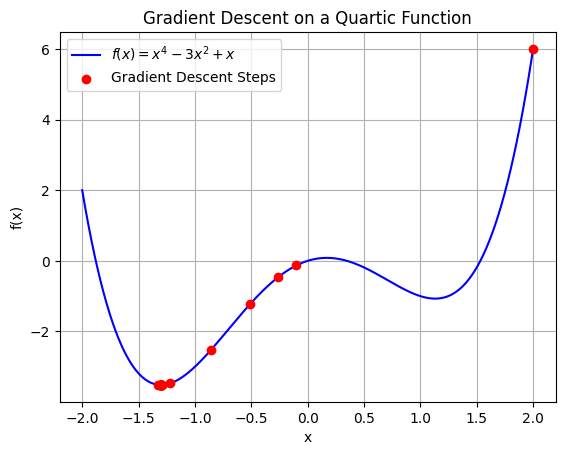

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Function and gradient
def f(x):
    return x**4 - 3*x**2 + x

def grad_f(x):
    return 4*x**3 - 6*x + 1

# Gradient descent parameters
alpha = 0.1
x_start = 2
iterations = 50

x_values = [x_start]
f_values = [f(x_start)]

# Gradient descent
x = x_start
for _ in range(iterations):
    x = x - alpha * grad_f(x)
    x_values.append(x)
    f_values.append(f(x))

x_range = np.linspace(-2, 2, 300)
y_range = f(x_range)

plt.plot(x_range, y_range, label=r"$f(x) = x^4 - 3x^2 + x$", color="blue")
plt.scatter(x_values, f_values, color="red", label="Gradient Descent Steps", zorder=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on a Quartic Function")
plt.legend()
plt.grid()
plt.show()